In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing()

In [3]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
from os import X_OK
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [6]:
np.random.seed(42)
tf.random.set_seed(42)

In [7]:
X_train.shape

(11610, 8)

In [8]:
X_test.shape

(5160, 8)

In [9]:
X_valid.shape

(3870, 8)

In [27]:
input_=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30,activation="relu")(input_)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.Concatenate()([input_,hidden2])
output=keras.layers.Dense(1)(concat)
model=keras.models.Model(inputs=[input_],outputs=[output])

In [28]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        270 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 30)        │        930 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

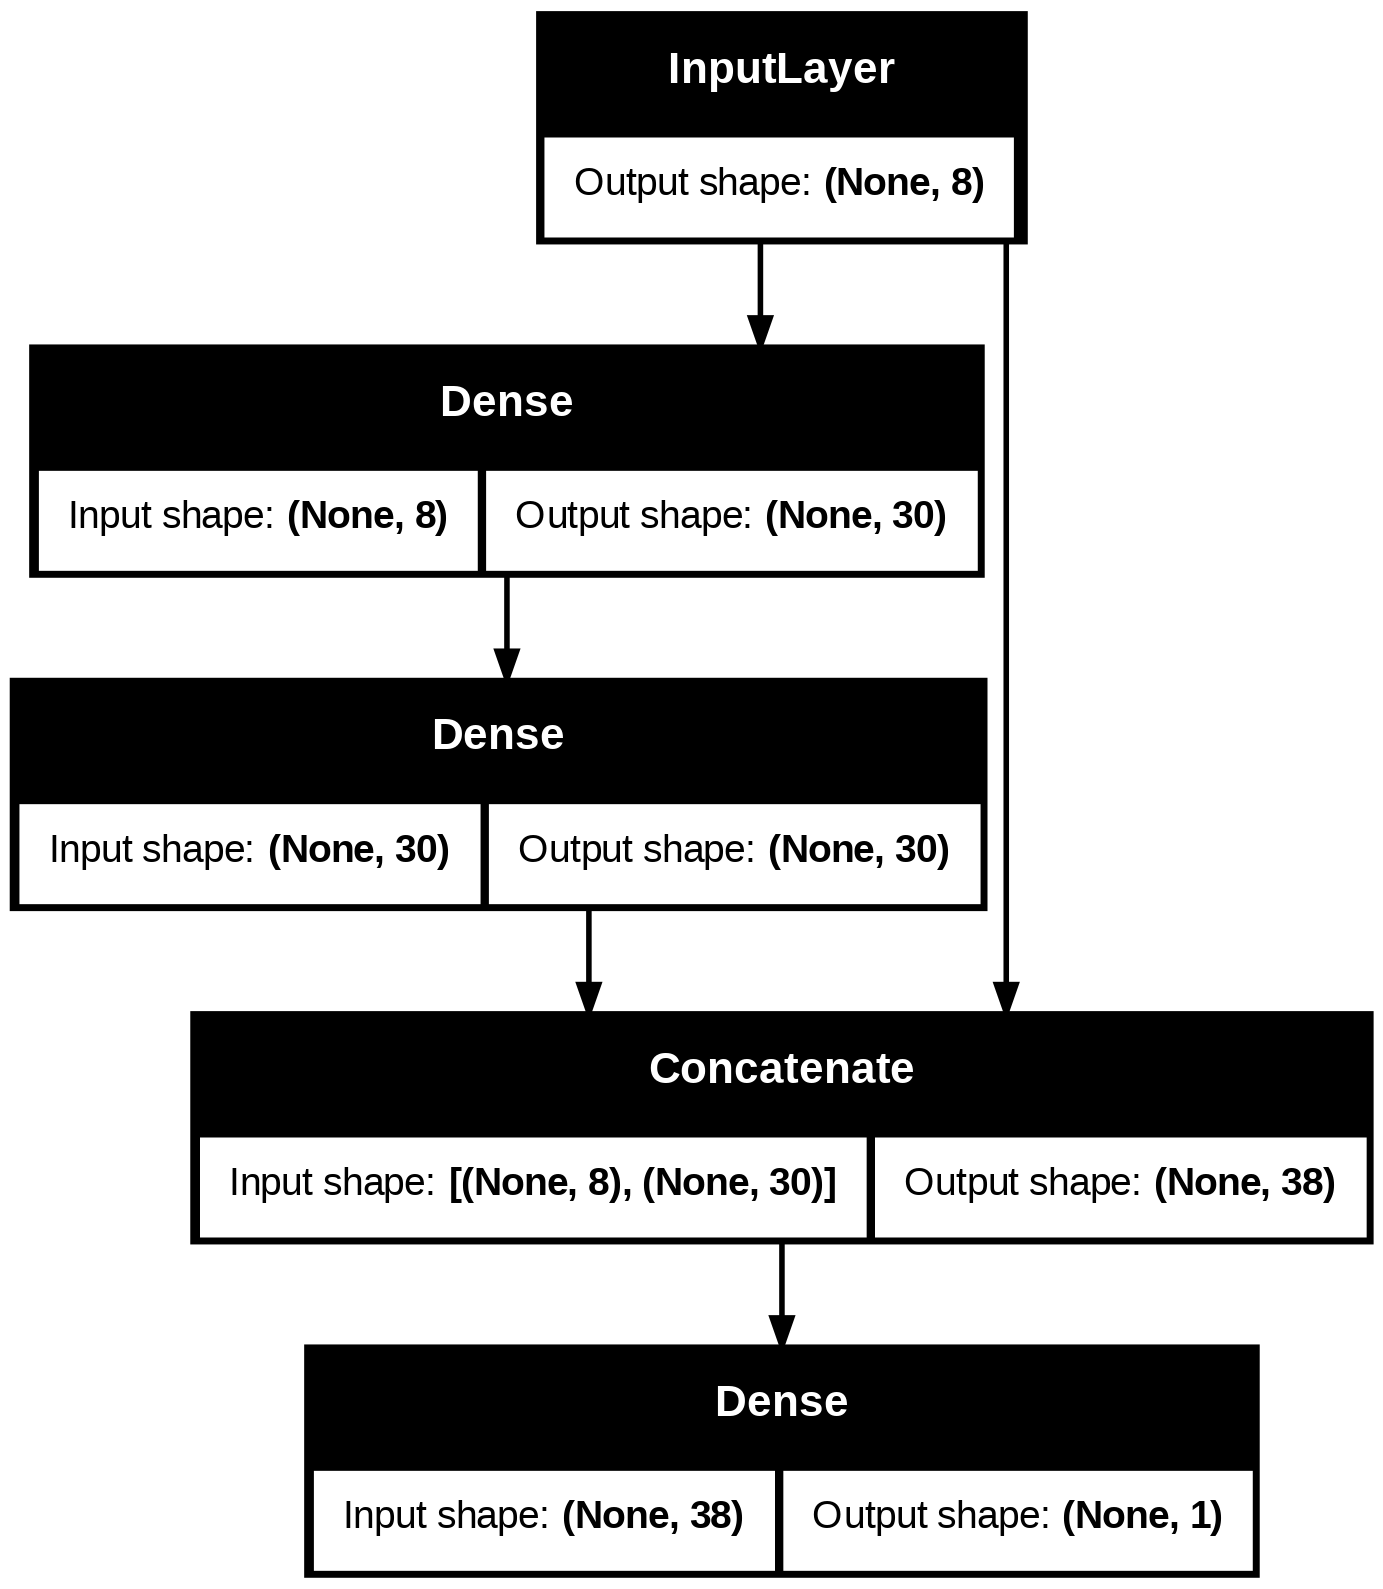

In [29]:
import pydot
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [31]:
model.compile(loss="mean_squared_error",optimizer="sgd", metrics=["mae"])

In [36]:
model_history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4985 - mae: 0.4591 - val_loss: 100.9546 - val_mae: 0.7043
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6931 - mae: 0.4923 - val_loss: 61.4593 - val_mae: 0.6583
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6013 - mae: 0.4704 - val_loss: 26.2141 - val_mae: 0.5558
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4552 - mae: 0.4493 - val_loss: 81.1945 - val_mae: 0.6645
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6291 - mae: 0.4792 - val_loss: 137.8738 - val_mae: 0.7421
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.8716 - mae: 0.4961 - val_loss: 348.9873 - val_mae: 0.9938
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.6301 - mae: 0.5838 - val_loss: 1842.1025 - val_mae: 1.7125
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

In [37]:
mae_test=model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - loss: nan - mae: nan


In [38]:
model_history.history

{'loss': [0.7196108102798462,
  1.070521593093872,
  0.8714355230331421,
  0.6279204487800598,
  0.9412845969200134,
  1.7802373170852661,
  2.720743179321289,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'mae': [0.4914534091949463,
  0.5452693700790405,
  0.47846120595932007,
  0.4757992625236511,
  0.517681360244751,
  0.6007906198501587,
  0.7069492340087891,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'val_loss': [100.95464324951172,
  61.4593391418457,
  26.214073181152344,
  81.1944580078125,
  137.87380981445312,
  348.9872741699219,
  1842.1025390625,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'val_mae': [0.7042521834373474,
  0.6583153009414673,
  0.5558431148529053,
  0.6645343899726868,
  0.7420573830604553,
  0.9938328862190247,
  1.71249258518219,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

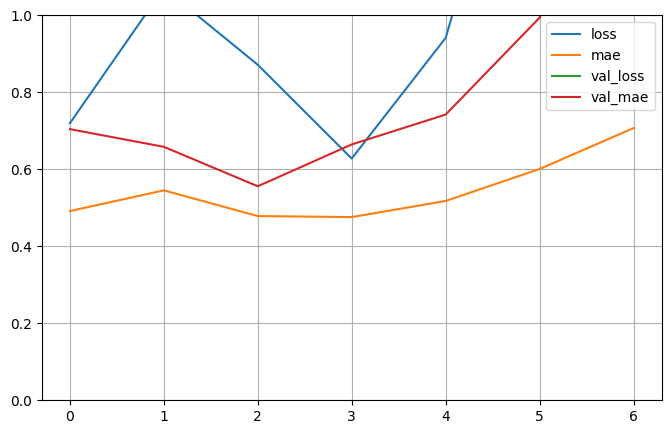

In [39]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [26]:
X_new=X_test[:3]
y_pred=model.predict(X_new)
print(y_pred)
print(y_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.67668545]
 [1.6268349 ]
 [4.2994814 ]]
[0.477   0.458   5.00001]
